In [1]:
# Import libraries
import os
import tensorflow as tf
import numpy as np
from random import choice
import matplotlib.pyplot as plt
from tensorflow import keras
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Input
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import SGD,Adam

Using TensorFlow backend.


In [2]:
## Set GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES']="0"
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5



In [3]:
## Data path
FatherPath = os.getcwd()
LabelName = 'Dataset_label.npy'
DataName = 'Dataset_data.npy'

# Train dataset file
ImageSetName_Train = 'ImageSetInitial_plus'

ImageSet_Train = 'ImageSetTrain'

In [4]:
## Generate images matrix
if not os.path.isdir(os.path.join(FatherPath, ImageSet_Train)):
    from ConductRawImage import ConductRawImage
    ConductRawImage(ImageSetName_Train, ImageSet_Train)

In [5]:
## Load Data
# load whole training data
LabelPath_Train = os.path.join(FatherPath, ImageSet_Train, LabelName)
DataPath_Train = os.path.join(FatherPath, ImageSet_Train, DataName)

Data_Train = np.load(DataPath_Train)
Label_Train = np.load(LabelPath_Train)

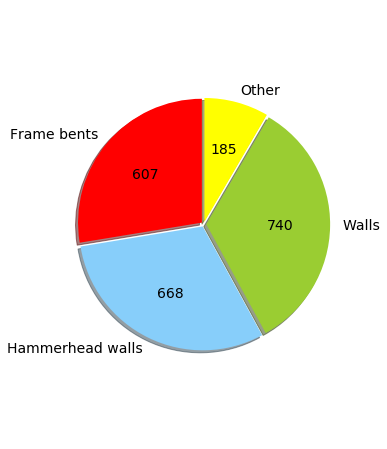

In [6]:
## Check the information of dataset
fontsize = 14

num_0 = np.sum(Label_Train==0) # Frame
num_1 = np.sum(Label_Train==1) # Hammer Head
num_2 = np.sum(Label_Train==2) # Wall
num_3 = np.sum(Label_Train==3) # Other

plt.figure(figsize=(5, 8))
LabelsName = ['Frame bents', 'Hammerhead walls', 'Walls', 'Other']
sizes = [num_0, num_1, num_2, num_3]
colors = ['red', 'lightskyblue', 'yellowgreen', 'yellow'] 
explode = (0.02, 0.02, 0.02, 0.02)
# patches, text1, text2 = plt.pie(sizes, explode=explode, labels=LabelsName,  colors=colors, autopct='%3.2f%%', 
#                                 shadow=True, startangle=90, pctdistance=0.6)

patches, text1, text2 = plt.pie(sizes, explode=explode, labels=LabelsName,  colors=colors, autopct='%3.2f%%', 
                                shadow=True, startangle=90, pctdistance=0.6)

for i, a in enumerate(text2):
    a.set_text("{}".format(sizes[i]))
    
for t in text1:
    t.set_size(fontsize)
    
for t in text2:
    t.set_size(fontsize)

plt.axis('equal')
plt.show()

2200


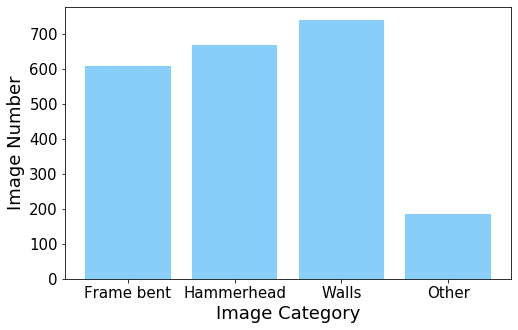

In [7]:
## Check the information of dataset
Name_list = ['Frame bent', 'Hammerhead', 'Walls', 'Other']
num_list = [num_0, num_1, num_2, num_3]
print(np.sum(num_list))
plt.figure(figsize=(8, 5))
plt.bar(range(len(num_list)), num_list, color='lightskyblue', tick_label=Name_list)
plt.xlabel('Image Category', fontsize=18)
plt.ylabel('Image Number', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [8]:
# Split the training and validation dataset
Dataset = 'TrainTest'
random_state = 5
SavedPath = os.path.join(FatherPath, Dataset+str(random_state))

xTrainPath = os.path.join(SavedPath, 'x_train.npy')
yTrainPath = os.path.join(SavedPath, 'y_train.npy')
xTestPath = os.path.join(SavedPath, 'x_test.npy')
yTestPath = os.path.join(SavedPath, 'y_test.npy')

Label_Train_OneHot = to_categorical(Label_Train)
x_train, x_test, y_train, y_test = train_test_split(Data_Train, Label_Train_OneHot, 
                                                                            test_size=0.2, random_state=random_state)
if not os.path.isdir(SavedPath):
        os.makedirs(SavedPath)
        
np.save(xTrainPath, x_train)
np.save(yTrainPath, y_train)
np.save(xTestPath, x_test)
np.save(yTestPath, y_test)

In [9]:
print(len(x_test))

440


In [10]:
# Label as frame vs others
y_train_Frame = []
y_test_Frame = []
for ii in range(len(y_train)):
    if y_train[ii][0] == 1:
        y_train_Frame.append(np.array([1, 0]))
    else:
        y_train_Frame.append(np.array([0, 1]))
for ii in range(len(y_test)):
    if y_test[ii][0] == 1:
        y_test_Frame.append(np.array([1, 0]))
    else:
        y_test_Frame.append(np.array([0, 1]))
        
y_train_Frame = np.array(y_train_Frame)
y_test_Frame = np.array(y_test_Frame)

In [11]:
# Label as Hammer vs others
y_train_Hammer = []
y_test_Hammer = []
for ii in range(len(y_train)):
    if y_train[ii][1] == 1:
        y_train_Hammer.append(np.array([1, 0]))
    else:
        y_train_Hammer.append(np.array([0, 1]))
for ii in range(len(y_test)):
    if y_test[ii][1] == 1:
        y_test_Hammer.append(np.array([1, 0]))
    else:
        y_test_Hammer.append(np.array([0, 1]))
        
y_train_Hammer = np.array(y_train_Hammer)
y_test_Hammer = np.array(y_test_Hammer)

In [12]:
# Label as Wall vs others
y_train_Wall = []
y_test_Wall = []
for ii in range(len(y_train)):
    if y_train[ii][2] == 1:
        y_train_Wall.append(np.array([1, 0]))
    else:
        y_train_Wall.append(np.array([0, 1]))
for ii in range(len(y_test)):
    if y_test[ii][2] == 1:
        y_test_Wall.append(np.array([1, 0]))
    else:
        y_test_Wall.append(np.array([0, 1]))
        
y_train_Wall = np.array(y_train_Wall)
y_test_Wall = np.array(y_test_Wall)

In [35]:
## Model 1: Frame vs others
# Set the Data Generator and model
datagen1 = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

input_tensor1 = Input(shape=(228, 228, 3))
vgg_model1 = applications.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor1)

layer_dict = dict([(layer.name, layer) for layer in vgg_model1.layers])

# Add Extra Layers for Classification
x = layer_dict['block5_pool'].output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

from keras.models import Model
custom_model1 = Model(input=vgg_model1.input, output=x)

# Set the layers that we want to train
for layer in custom_model1.layers[:15]:
    layer.trainable = False
    
opt1 = Adam(lr=0.00001)
# Compile model with suitable loss function, optimizer, etc.
custom_model1.compile(loss = 'binary_crossentropy',optimizer = opt1, metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [36]:
# Model training: set the batch size, epochs, etc.
BS = 32
history_Frame = custom_model1.fit_generator(datagen1.flow(x_train,y_train_Frame,batch_size=BS),
                                            steps_per_epoch=len(x_train)//BS, epochs=80,
                                            validation_data=(x_test,y_test_Frame))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/80
55/55 [==============================] - 18s 323ms/step - loss: 3.7243 - accuracy: 0.6614 - val_loss: 2.1004 - val_accuracy: 0.7841
Epoch 2/80
55/55 [==============================] - 10s 177ms/step - loss: 2.2641 - accuracy: 0.7563 - val_loss: 1.0630 - val_accuracy: 0.8614
Epoch 3/80
55/55 [==============================] - 11s 195ms/step - loss: 1.6749 - accuracy: 0.8074 - val_loss: 0.7929 - val_accuracy: 0.8932
Epoch 4/80
55/55 [==============================] - 11s 194ms/step - loss: 1.2734 - accuracy: 0.8409 - val_loss: 0.7668 - val_accuracy: 0.8932
Epoch 5/80
55/55 [==============================] - 11s 195ms/step - loss: 1.0067 - accuracy: 0.8591 - val_loss: 0.6745 - val_accuracy: 0.8977
Epoch 6/80
55/55 [==============================] - 11s 195ms/step - loss: 0.7956 - accuracy: 0.8767 - val_loss: 0.5578 - val_accuracy: 0.9091
Epoch 7/80
55/55 [=============================

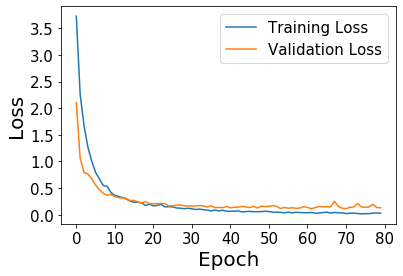

In [46]:
# Loss curve during training
plt.figure(figsize=(6, 4))
plt.plot(history_Frame.history['loss'], label='Training Loss')
plt.plot(history_Frame.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc='upper right', fontsize=15)
plt.show()

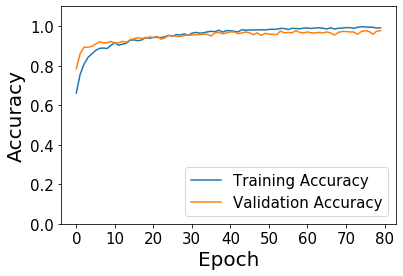

In [52]:
# Accuracy curve during training
plt.figure(figsize=(6, 4))
plt.plot(history_Frame.history['accuracy'], label='Training Accuracy')
plt.plot(history_Frame.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 1.1)

plt.legend(loc='lower right', fontsize=15)
plt.show()

In [ ]:
# Predict the label in validation set ==> it output the possiblity of each category rather than predicted label. 
# You may select predicted label according to the one has maximum possibility   
outputs_Frame = custom_model1.predict(x_test)

In [14]:
## Model 2 ==> Hammer vs Other
datagen2 = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

input_tensor2 = Input(shape=(228, 228, 3))
vgg_model2 = applications.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor2)

layer_dict = dict([(layer.name, layer) for layer in vgg_model2.layers])

x = layer_dict['block5_pool'].output

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

from keras.models import Model
custom_model2 = Model(input=vgg_model2.input, output=x)

for layer in custom_model2.layers[:15]:
    layer.trainable = False
    
opt2 = Adam(lr=0.00001)
custom_model2.compile(loss = 'binary_crossentropy',optimizer = opt2, metrics=['accuracy'])

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [15]:
BS = 32
history_Hammer = custom_model2.fit_generator(datagen2.flow(x_train,y_train_Hammer,batch_size=BS),
                                            steps_per_epoch=len(x_train)//BS, epochs=80,
                                            validation_data=(x_test,y_test_Hammer))

Epoch 1/80
55/55 [==============================] - 12s 217ms/step - loss: 4.1849 - accuracy: 0.6477 - val_loss: 3.3917 - val_accuracy: 0.7091- loss: 4.1683 - accuracy: 0.
Epoch 2/80
55/55 [==============================] - 11s 195ms/step - loss: 3.6939 - accuracy: 0.6540 - val_loss: 2.3752 - val_accuracy: 0.7409
Epoch 3/80
55/55 [==============================] - 11s 198ms/step - loss: 2.8454 - accuracy: 0.6812 - val_loss: 1.6265 - val_accuracy: 0.7636
Epoch 4/80
55/55 [==============================] - 11s 198ms/step - loss: 1.9672 - accuracy: 0.7193 - val_loss: 1.1516 - val_accuracy: 0.7727
Epoch 5/80
55/55 [==============================] - 11s 199ms/step - loss: 1.5473 - accuracy: 0.7205 - val_loss: 0.9793 - val_accuracy: 0.7682
Epoch 6/80
55/55 [==============================] - 11s 196ms/step - loss: 1.1824 - accuracy: 0.7176 - val_loss: 0.7360 - val_accuracy: 0.8000ss: 1.218
Epoch 7/80
55/55 [==============================] - 11s 198ms/step - loss: 0.8371 - accuracy: 0.7557 - v

In [16]:
# Model 3 ==> Wall, Other
datagen3 = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')


input_tensor3 = Input(shape=(228, 228, 3))
vgg_model3 = applications.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor3)

layer_dict = dict([(layer.name, layer) for layer in vgg_model3.layers])

x = layer_dict['block5_pool'].output

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

from keras.models import Model
custom_model3 = Model(input=vgg_model3.input, output=x)

for layer in custom_model3.layers[:15]:
    layer.trainable = False
    
opt3 = Adam(lr=0.00001)
custom_model3.compile(loss = 'binary_crossentropy',optimizer = opt3, metrics=['accuracy'])

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [17]:
BS = 32
history_Wall = custom_model3.fit_generator(datagen3.flow(x_train,y_train_Wall,batch_size=BS),
                                            steps_per_epoch=len(x_train)//BS, epochs=80,
                                            validation_data=(x_test,y_test_Wall))

Epoch 1/80
55/55 [==============================] - 12s 216ms/step - loss: 4.0926 - accuracy: 0.6216 - val_loss: 2.7299 - val_accuracy: 0.6932
Epoch 2/80
55/55 [==============================] - 11s 196ms/step - loss: 3.1823 - accuracy: 0.6636 - val_loss: 2.0270 - val_accuracy: 0.7545
Epoch 3/80
55/55 [==============================] - 11s 196ms/step - loss: 2.5323 - accuracy: 0.6858 - val_loss: 1.3734 - val_accuracy: 0.7773
Epoch 4/80
55/55 [==============================] - 11s 197ms/step - loss: 1.9625 - accuracy: 0.6966 - val_loss: 0.9622 - val_accuracy: 0.7795
Epoch 5/80
55/55 [==============================] - 11s 196ms/step - loss: 1.3964 - accuracy: 0.7085 - val_loss: 0.7851 - val_accuracy: 0.7932
Epoch 6/80
55/55 [==============================] - 11s 197ms/step - loss: 1.1008 - accuracy: 0.7199 - val_loss: 0.6220 - val_accuracy: 0.797775  - ETA: 0s - loss: 1.0913 - accuracy: 0.72
Epoch 7/80
55/55 [==============================] - 11s 196ms/step - loss: 0.9822 - accuracy: 0.7

55/55 [==============================] - 11s 198ms/step - loss: 0.0933 - accuracy: 0.9648 - val_loss: 0.2300 - val_accuracy: 0.9318
Epoch 58/80
55/55 [==============================] - 11s 200ms/step - loss: 0.0863 - accuracy: 0.9648 - val_loss: 0.2780 - val_accuracy: 0.9341
Epoch 59/80
55/55 [==============================] - 11s 198ms/step - loss: 0.0875 - accuracy: 0.9705 - val_loss: 0.2504 - val_accuracy: 0.9273ss: 0.0988  - ETA: 4s - los - ETA: 1s - loss: 0.0938 - accura - ETA: 1s - loss: 0.0894 - accu
Epoch 60/80
55/55 [==============================] - 11s 196ms/step - loss: 0.0699 - accuracy: 0.9744 - val_loss: 0.2291 - val_accuracy: 0.9386
Epoch 61/80
55/55 [==============================] - 11s 197ms/step - loss: 0.0753 - accuracy: 0.9659 - val_loss: 0.2256 - val_accuracy: 0.9205
Epoch 62/80
55/55 [==============================] - 11s 197ms/step - loss: 0.0801 - accuracy: 0.9710 - val_loss: 0.2443 - val_accuracy: 0.9295
Epoch 63/80
55/55 [==============================] - 11

In [18]:
outputs_Frame = custom_model1.predict(x_test)
outputs_Hammer = custom_model2.predict(x_test)
outputs_Wall = custom_model3.predict(x_test)

In [19]:
threshold_Frame = np.arange(0.499, 0.999, 0.05)
Prediction_Frame = []
for jj in range(len(threshold_Frame)):
    prediction_Frame = []
    for ii in range(len(outputs_Frame)):
        if outputs_Frame[ii][0] > threshold_Frame[jj]:
            prediction_Frame.append(0)
        else:
            prediction_Frame.append(1)
    prediction_Frame = np.array(prediction_Frame)
    Prediction_Frame.append(prediction_Frame)

In [20]:
threshold_Hammer = np.arange(0.499, 0.999, 0.05)
Prediction_Hammer = []
for jj in range(len(threshold_Hammer)):
    prediction_Hammer = []
    for ii in range(len(outputs_Hammer)):
        if outputs_Hammer[ii][0] > threshold_Hammer[jj]:
            prediction_Hammer.append(0)
        else:
            prediction_Hammer.append(1)
    prediction_Hammer = np.array(prediction_Hammer)
    Prediction_Hammer.append(prediction_Hammer)

In [21]:
threshold_Wall = np.arange(0.499, 0.999, 0.05)
Prediction_Wall = []
for jj in range(len(threshold_Wall)):
    prediction_Wall = []
    for ii in range(len(outputs_Wall)):
        if outputs_Wall[ii][0] > threshold_Wall[jj]:
            prediction_Wall.append(0)
        else:
            prediction_Wall.append(1)
    prediction_Wall = np.array(prediction_Wall)
    Prediction_Wall.append(prediction_Wall)

In [22]:
a0 = 0
a1 = 1
a2 = 0.3

CostCM = np.array([[a0, a1, a1, a2], [a2, a0, a1, a2], [a2, a2, a0, a2], [a1, a1, a1, a0]])
print(CostCM)
# print(CostCM*CostCM)
# print(np.sum(CostCM*CostCM))

[[0.  1.  1.  0.3]
 [0.3 0.  1.  0.3]
 [0.3 0.3 0.  0.3]
 [1.  1.  1.  0. ]]


In [23]:
ACC = []
# PRE = []
# REC = []
# F1 = []
Order = []
COST = []
y_test_all = np.argmax(y_test,axis=1)
for kk in range(len(Prediction_Frame)):
    for ll in range(len(Prediction_Wall)):
        for mm in range(len(Prediction_Hammer)):
            prediction_Frame = Prediction_Frame[kk]
            prediction_Wall = Prediction_Wall[ll]
            prediction_Hammer = Prediction_Hammer[mm]

            Prediction_all = []
            for ii in range(len(x_test)):
                if prediction_Frame[ii] == 0:
                    Prediction_all.append(0)
                elif prediction_Wall[ii] == 0:
                    Prediction_all.append(2)
                elif prediction_Hammer[ii] == 0:
                    Prediction_all.append(1)
                else:
                    Prediction_all.append(3)
            Prediction_all = np.array(Prediction_all)       
            cm = confusion_matrix(Prediction_all, y_test_all)
            cost = np.sum(cm.T*CostCM)
            COST.append(cost)
            
            accuracy_all = accuracy_score(y_test_all, Prediction_all)
#             precision_all = precision_score(y_test_all, Prediction_all, average='macro')
#             recall_all = recall_score(y_test_all, Prediction_all, average='macro')
#             f1_all = f1_score(y_test_all, Prediction_all, average='macro')
            
            ACC.append(accuracy_all)
#             PRE.append(precision_all)
#             REC.append(recall_all)
#             F1.append(f1_all)
            Order.append([kk, ll, mm])

In [24]:
# print(cm)
# print(np.sum(cm*CostCM))
# print(COST)
location = np.where(COST==min(COST))[0]
# print(COST[location[0]])
# print(COST[location[1]])
print(min(COST))
for ii in range(len(location)):
    order_threshold = Order[location[ii]]
    print(ACC[location[ii]])
#     print(Order[location[ii]])
#     print(threshold_Frame[order_threshold[0]])
#     print(threshold_Wall[order_threshold[1]])
#     print(threshold_Hammer[order_threshold[2]])

36.8
0.8590909090909091
0.8590909090909091


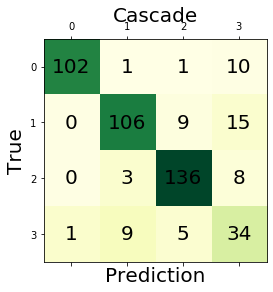

In [25]:
prediction_Frame = Prediction_Frame[order_threshold[0]]
prediction_Wall = Prediction_Wall[order_threshold[1]]
prediction_Hammer = Prediction_Hammer[order_threshold[2]]
Prediction_all = []
for ii in range(len(x_test)):
    if prediction_Frame[ii] == 0:
        Prediction_all.append(0)
    elif prediction_Wall[ii] == 0:
        Prediction_all.append(2)
    elif prediction_Hammer[ii] == 0:
        Prediction_all.append(1)
    else:
        Prediction_all.append(3)
Prediction_all = np.array(Prediction_all)   

y_test_all = np.argmax(y_test,axis=1)
cm1 = confusion_matrix(Prediction_all, y_test_all)
plt.matshow(cm1, cmap=plt.cm.YlGn)
plt.title('Cascade', fontsize = 20)
plt.xlabel('Prediction', fontsize = 20)
plt.ylabel('True', fontsize = 20)
for x in range(len(cm1)):
    for y in range(len(cm1)):
        plt.annotate(cm1[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center', fontsize = 20)

In [26]:
print(np.sum(cm1.T*CostCM))

36.8


In [27]:
accuracy_all = accuracy_score(y_test_all, Prediction_all)
precision_all = precision_score(y_test_all, Prediction_all, average='macro')
recall_all = recall_score(y_test_all, Prediction_all, average='macro')
f1_all = f1_score(y_test_all, Prediction_all, average='macro')

print('accuracy is:', accuracy_all)
print('precision is:', precision_all)
print('recall is:', recall_all)
print('f1-score is:', f1_all)

accuracy is: 0.8590909090909091
precision is: 0.8222931257199311
recall is: 0.8322922691343744
f1-score is: 0.8226140906981627


In [28]:
from sklearn.metrics import classification_report
target_names = ['0 - Frame', '1 - Hammer', '2 - Wall', '3 - Other']
print(classification_report(y_test_all, Prediction_all, target_names=target_names))

              precision    recall  f1-score   support

   0 - Frame       0.99      0.89      0.94       114
  1 - Hammer       0.89      0.82      0.85       130
    2 - Wall       0.90      0.93      0.91       147
   3 - Other       0.51      0.69      0.59        49

    accuracy                           0.86       440
   macro avg       0.82      0.83      0.82       440
weighted avg       0.88      0.86      0.87       440



In [29]:
# cm = confusion_matrix(Prediction_all, y_test_all)
# plt.matshow(cm, cmap=plt.cm.YlGn)
# plt.xlabel('Prediction', fontsize = 20)
# plt.ylabel('True', fontsize = 20)
# for x in range(len(cm)):
#     for y in range(len(cm)):
#         plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center', fontsize = 20)

In [30]:
# y_testFrame = np.argmax(y_test_Frame,axis=1)

# cm = confusion_matrix(prediction_Frame, y_testFrame)
# plt.matshow(cm, cmap=plt.cm.YlGn)
# for x in range(len(cm)):
#     for y in range(len(cm)):
#         plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center', fontsize = 20)

In [31]:
# y_testHammer = np.argmax(y_test_Hammer,axis=1)

# cm = confusion_matrix(prediction_Hammer, y_testHammer)
# plt.matshow(cm, cmap=plt.cm.YlGn)
# for x in range(len(cm)):
#     for y in range(len(cm)):
#         plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center', fontsize = 20)

In [32]:
# y_testWall = np.argmax(y_test_Wall,axis=1)

# cm = confusion_matrix(prediction_Wall, y_testWall)
# plt.matshow(cm, cmap=plt.cm.YlGn)
# for x in range(len(cm)):
#     for y in range(len(cm)):
#         plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center', fontsize = 20)

In [33]:
# accuracy_Frame = accuracy_score(y_testFrame, prediction_Frame)
# precision_Frame = precision_score(y_testFrame, prediction_Frame, average='macro')
# recall_Frame = recall_score(y_testFrame, prediction_Frame, average='macro')
# f1_Frame = f1_score(y_testFrame, prediction_Frame, average='macro')

# print('accuracy is:', accuracy_Frame)
# print('precision is:', precision_Frame)
# print('recall is:', recall_Frame)
# print('f1-score is:', f1_Frame)

In [34]:
# accuracy_Hammer = accuracy_score(y_testHammer, prediction_Hammer)
# precision_Hammer = precision_score(y_testHammer, prediction_Hammer, average='macro')
# recall_Hammer = recall_score(y_testHammer, prediction_Hammer, average='macro')
# f1_Hammer = f1_score(y_testHammer, prediction_Hammer, average='macro')

# print('accuracy is:', accuracy_Hammer)
# print('precision is:', precision_Hammer)
# print('recall is:', recall_Hammer)
# print('f1-score is:', f1_Hammer)

In [35]:
# accuracy_Wall = accuracy_score(y_testWall, prediction_Wall)
# precision_Wall = precision_score(y_testWall, prediction_Wall, average='macro')
# recall_Wall = recall_score(y_testWall, prediction_Wall, average='macro')
# f1_Wall = f1_score(y_testWall, prediction_Wall, average='macro')

# print('accuracy is:', accuracy_Wall)
# print('precision is:', precision_Wall)
# print('recall is:', recall_Wall)
# print('f1-score is:', f1_Wall)

In [36]:
# Model 5 ==> Multi-category
datagen5 = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')


input_tensor5 = Input(shape=(228, 228, 3))
vgg_model5 = applications.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor5)

layer_dict = dict([(layer.name, layer) for layer in vgg_model5.layers])

x = layer_dict['block5_pool'].output

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

from keras.models import Model
custom_model5 = Model(input=vgg_model5.input, output=x)

for layer in custom_model5.layers[:15]:
    layer.trainable = False
    
opt5 = Adam(lr=0.00001)
custom_model5.compile(loss = 'categorical_crossentropy',optimizer = opt5, metrics=['accuracy'])

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [37]:
BS = 32
history_multi = custom_model5.fit_generator(datagen5.flow(x_train,y_train,batch_size=BS),
                                            steps_per_epoch=len(x_train)//BS, epochs=100,
                                            validation_data=(x_test,y_test))

Epoch 1/100
55/55 [==============================] - 12s 216ms/step - loss: 9.0160 - accuracy: 0.3091 - val_loss: 3.6185 - val_accuracy: 0.3659
Epoch 2/100
55/55 [==============================] - 11s 196ms/step - loss: 3.3540 - accuracy: 0.3244 - val_loss: 2.0061 - val_accuracy: 0.42273.3995 - accuracy
Epoch 3/100
55/55 [==============================] - 11s 197ms/step - loss: 2.1979 - accuracy: 0.3722 - val_loss: 1.4887 - val_accuracy: 0.4341ETA: 1s - loss: 2.2805 - accuracy:  - ETA: 1s - loss: 2.2490 - ac
Epoch 4/100
55/55 [==============================] - 11s 198ms/step - loss: 1.7144 - accuracy: 0.3705 - val_loss: 1.2577 - val_accuracy: 0.4886
Epoch 5/100
55/55 [==============================] - 11s 196ms/step - loss: 1.4035 - accuracy: 0.4455 - val_loss: 1.1592 - val_accuracy: 0.5364
Epoch 6/100
55/55 [==============================] - 11s 199ms/step - loss: 1.2815 - accuracy: 0.4932 - val_loss: 1.1003 - val_accuracy: 0.5477
Epoch 7/100
55/55 [==============================] - 1

In [38]:
outputs_multi = custom_model5.predict(x_test)

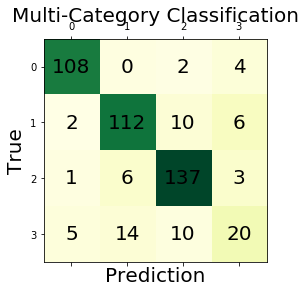

In [39]:
Prediction_multi = np.argmax(outputs_multi, axis=1)
y_test_multi = np.argmax(y_test,axis=1)

cm = confusion_matrix(Prediction_multi, y_test_multi)
plt.matshow(cm, cmap=plt.cm.YlGn)
plt.title('Multi-Category Classification', fontsize = 20)
plt.xlabel('Prediction', fontsize = 20)
plt.ylabel('True', fontsize = 20)
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center', fontsize = 20)

In [40]:
print(np.sum(cm.T*CostCM))
# print(cm)
# print(cm.T*CostCM)

47.60000000000001


In [41]:
accuracy_multi = accuracy_score(y_test_multi, Prediction_multi)
precision_multi = precision_score(y_test_multi, Prediction_multi, average='macro')
recall_multi = recall_score(y_test_multi, Prediction_multi, average='macro')
f1_multi = f1_score(y_test_multi, Prediction_multi, average='macro')

print('accuracy is:', accuracy_multi)
print('precision is:', precision_multi)
print('recall is:', recall_multi)
print('f1-score is:', f1_multi)

accuracy is: 0.8568181818181818
precision is: 0.8118037893574653
recall is: 0.7872607342532154
f1-score is: 0.7943304953734412


In [42]:
from sklearn.metrics import classification_report
target_names = ['0 - Frame', '1 - Hammer', '2 - Wall', '3 - Other']
print(classification_report(y_test_multi, Prediction_multi, target_names=target_names))

              precision    recall  f1-score   support

   0 - Frame       0.93      0.95      0.94       114
  1 - Hammer       0.85      0.86      0.85       130
    2 - Wall       0.86      0.93      0.90       147
   3 - Other       0.61      0.41      0.49        49

    accuracy                           0.86       440
   macro avg       0.81      0.79      0.79       440
weighted avg       0.85      0.86      0.85       440



In [43]:
name1 = 'Frame_Classifier' + str(random_state) + '.h5'
name2 = 'Hammer_Classifier' + str(random_state) + '.h5'
name3 = 'Wall_Classifier' + str(random_state) + '.h5'
name4 = 'Multi_Classifier' + str(random_state) + '.h5'

custom_model1.save(name1)
custom_model2.save(name2)
custom_model3.save(name3)
custom_model5.save(name4)